In [177]:
import pandas as pd
import datetime
import csv
import numpy as np
import matplotlib.pyplot as plt
import re

To convert the ['Date of Travrel'] values into date format, i used this function authored by @alaudet https://gist.github.com/alaudet/307ac574973028497d083f6d43575214

In [11]:
def date_to_string(digit_date):
    new_form = []
    for d in digit_date:
        try:
            x = datetime.date(1899,12,30) + datetime.timedelta(days=float(d))
            new_form.append(x.strftime('%Y-%m-%d'))
        except:
            new_form.append('n/a')
    return new_form

# Import CSV data

In [12]:
cab_data = pd.read_csv('~/dg_intern/DataSets/Cab_Data.csv')
# the date are converted here, and there's no null value.
cab_data['Date of Travel'] = date_to_string(cab_data['Date of Travel'])
# cab_data['Date of Travel'] = pd.to_datetime(cab_data['Date of Travel'], errors='coerce')
cab_data.head()


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [13]:
list = []
# cab_data_company = pd.read_csv('~/dg_intern/DataSets/Cab_Data.csv', usecols=['Company'])
for name in cab_data['Company']:
    if list != []:
        if name in list:
            continue
        else:
            list.append(name)
    elif list == []:
        list.append(name)
# print(list)
print('The companies we are assessing are ' + str(list))

The companies we are assessing are ['Pink Cab', 'Yellow Cab']


In [14]:
city = pd.read_csv('~/dg_intern/DataSets/City.csv')
print('We have data collected from ' + str(len(city['City'])) + ' cities in total.')
city.head()

We have data collected from 20 cities in total.


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [15]:
customer_id = pd.read_csv('~/dg_intern/DataSets/Customer_ID.csv')
customer_id.head()
print(customer_id)

       Customer ID  Gender  Age  Income (USD/Month)
0            29290    Male   28               10813
1            27703    Male   27                9237
2            28712    Male   53               11242
3            28020    Male   23               23327
4            27182    Male   33                8536
...            ...     ...  ...                 ...
49166        12490    Male   33               18713
49167        14971    Male   30               15346
49168        41414    Male   38                3960
49169        41677    Male   23               19454
49170        39761  Female   32               10128

[49171 rows x 4 columns]


In [16]:
transaction = pd.read_csv('~/dg_intern/DataSets/Transaction_ID.csv')
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


# Establish the relational database

In [17]:
output1 = pd.merge(cab_data, transaction, 
                   on='Transaction ID', 
                   how='inner')
cab_trans_customer = pd.merge(output1, customer_id, 
                   on='Customer ID', 
                   how='inner')
cab_trans_customer.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237


# General information

## annual profit

In [18]:
profit_pi = [[],[],[]]
profit_ye = [[],[],[]]

# To divide data based on company
for i, name in enumerate(cab_trans_customer['Company']):
    a = cab_trans_customer['Price Charged'][i] - cab_trans_customer['Cost of Trip'][i]
    if name == 'Pink Cab':
        if cab_trans_customer['Date of Travel'][i][:4] == '2016':
            profit_pi[0].append(a)
        elif cab_trans_customer['Date of Travel'][i][:4] == '2017':
            profit_pi[1].append(a)
        elif cab_trans_customer['Date of Travel'][i][:4] == '2018':
            profit_pi[2].append(a)
    elif name == 'Yellow Cab':
        if cab_trans_customer['Date of Travel'][i][:4] == '2016':
            profit_ye[0].append(a)
        elif cab_trans_customer['Date of Travel'][i][:4] == '2017':
            profit_ye[1].append(a)
        elif cab_trans_customer['Date of Travel'][i][:4] == '2018':
            profit_ye[2].append(a)
    else:
        print('missing')
        

In [19]:
ann_profit = np.ma.zeros((2, 3)) # (company, year)
for j in range(3):
        ann_profit[0,j] = sum(profit_pi[j])
        ann_profit[1,j] = sum(profit_ye[j])



In [20]:
print(ann_profit)

[[ 1713511.224       2033654.90800001  1560162.18899998]
 [13926995.43159986 16575977.96800002 13517399.77119991]]


## seasonal profits

In [21]:
profit_pi_sea = [[0]*12 for i in range(3)]
profit_ye_sea = [[0]*12 for i in range(3)]
profit_pi_sea_list = np.ma.zeros((3,12,31))
profit_ye_sea_list = np.ma.zeros((3,12,31))
total_ride_profit = np.ma.zeros((2,3,12,31))
total_day = np.ma.zeros((2,3,12,31))

# To divide data based on company
for i, name in enumerate(cab_trans_customer['Company']):
    a = cab_trans_customer['Price Charged'][i] - cab_trans_customer['Cost of Trip'][i]
    mon = 10* int(cab_trans_customer['Date of Travel'][i][5]) + int(cab_trans_customer['Date of Travel'][i][6])
    day = 10* int(cab_trans_customer['Date of Travel'][i][8]) + int(cab_trans_customer['Date of Travel'][i][9])
    if name == 'Pink Cab':
        profit_pi_sea[int(cab_trans_customer['Date of Travel'][i][:4]) - 2016][mon-1] += a
        profit_pi_sea_list[int(cab_trans_customer['Date of Travel'][i][:4]) - 2016, mon - 1, day - 1] += a
        total_day[0,int(cab_trans_customer['Date of Travel'][i][:4]) - 2016, mon - 1, day - 1] += 1
        if a > 0:
            total_ride_profit[0,int(cab_trans_customer['Date of Travel'][i][:4]) - 2016, mon - 1, day - 1] += 1
            
        
    elif name == 'Yellow Cab':
        profit_ye_sea[int(cab_trans_customer['Date of Travel'][i][:4]) - 2016][mon-1] += a
        profit_ye_sea_list[int(cab_trans_customer['Date of Travel'][i][:4]) - 2016, mon - 1, day - 1] += a
        total_day[1,int(cab_trans_customer['Date of Travel'][i][:4]) - 2016, mon - 1, day - 1] += 1
        if a > 0:
            total_ride_profit[1,int(cab_trans_customer['Date of Travel'][i][:4]) - 2016, mon - 1, day - 1] += 1
    else:
        print('missing')
        


In [22]:
sea_profit = np.ma.empty((2,3,4)) # two companies, 3 years, 4 seasons
for j in range(3):
    sea_profit[0,j,0] = np.sum(profit_pi_sea_list[j,:3,:])
    sea_profit[0,j,1] = np.sum(profit_pi_sea_list[j,3:6,:])
    sea_profit[0,j,2] = np.sum(profit_pi_sea_list[j,6:9,:])
    sea_profit[0,j,3] = np.sum(profit_pi_sea_list[j,9:12,:])
    
    sea_profit[1,j,0] = np.sum(profit_ye_sea_list[j,:3,:])
    sea_profit[1,j,1] = np.sum(profit_ye_sea_list[j,3:6,:])
    sea_profit[1,j,2] = np.sum(profit_ye_sea_list[j,6:9,:])
    sea_profit[1,j,3] = np.sum(profit_ye_sea_list[j,9:12,:])



# profitable days (rides)

In [23]:
def count_profitable_day(profit):
    profit = np.reshape(profit, -1)
    count = 0
    for i in range(len(profit)):
        if profit[i] > 0:
            count+=1
        else:
            continue 
    return count

In [24]:
def total_day(day):
    day = np.reshape(day, -1)
    day[day == 0] = np.nan
    return len(day[~np.isnan(day)])

In [25]:
profit_day = np.ma.empty((2, 3, 5)) # (company, )
# 2016
for j in range(3):
        profit_day[0,j,0] = count_profitable_day(profit_pi_sea_list[j,:,:]) / total_day(profit_pi_sea_list[j,:,:])
        profit_day[0,j,1] = count_profitable_day(profit_pi_sea_list[j,:3,:]) / total_day(profit_pi_sea_list[j,:3,:])
        profit_day[0,j,2] = count_profitable_day(profit_pi_sea_list[j,3:6,:]) / total_day(profit_pi_sea_list[j,3:6,:])
        profit_day[0,j,3] = count_profitable_day(profit_pi_sea_list[j,6:9,:]) / total_day(profit_pi_sea_list[j,6:9,:])
        profit_day[0,j,4] = count_profitable_day(profit_pi_sea_list[j,9:12,:]) / total_day(profit_pi_sea_list[j,9:12,:])
    
        profit_day[1,j,0] = count_profitable_day(profit_ye_sea_list[j,:,:]) / total_day(profit_ye_sea_list[j,:,:])
        profit_day[1,j,1] = count_profitable_day(profit_ye_sea_list[j,:3,:]) / total_day(profit_ye_sea_list[j,:3,:])
        profit_day[1,j,2] = count_profitable_day(profit_ye_sea_list[j,3:6,:]) / total_day(profit_ye_sea_list[j,3:6,:])
        profit_day[1,j,3] = count_profitable_day(profit_ye_sea_list[j,6:9,:]) / total_day(profit_ye_sea_list[j,6:9,:])
        profit_day[1,j,4] = count_profitable_day(profit_ye_sea_list[j,9:12,:]) / total_day(profit_ye_sea_list[j,9:12,:])


# problem point: we haven't talked about the portion of the profit day

## portion of total seasonal profits/ total profits over the years

In [26]:
sea_ann_profit = np.ma.empty((2, 4))
for i in range(2):
    for sea in range(4):
        sum_ann_profit = sum(ann_profit[i, :]) #(company, year)
        sum_sea_profit = sum(sea_profit[i, :, sea]) #(company, year, season)
        sea_ann_profit[i, sea] = sum_sea_profit / sum_ann_profit
        sea_ann_profit[i, sea] = round(sea_ann_profit[i, sea],3)
        

## portion of seasonal profits of each year: seasonal profit each year / total profit each year

In [27]:
sea_profit_annpor = np.ma.empty((2, 3, 4))
for i in range(2):
    for iyear in range(3):
        for k in range(4):
            sea_profit_annpor[i, iyear, k] = sea_profit[i, iyear, k] / ann_profit[i,iyear]
            sea_profit_annpor[i, iyear, k] = "{:.2f}".format(sea_profit_annpor[i, iyear, k])
            

## plots

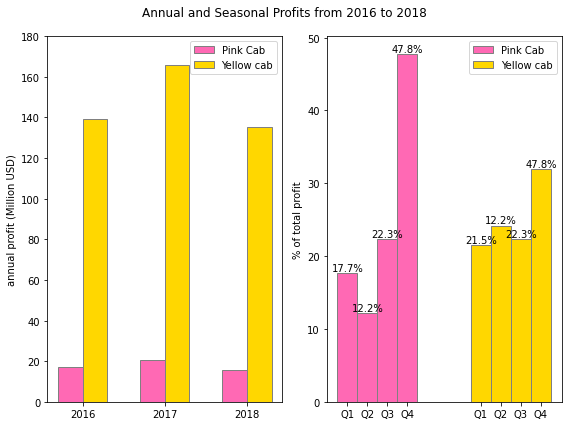

In [29]:
barWidth = 0.3
br1 = np.arange(3)
br2 = [x + barWidth for x in br1]
fig, axs = plt.subplots(nrows=1,ncols=2, figsize= (8,6))
fig.suptitle('Annual and Seasonal Profits from 2016 to 2018')
axs[0].bar(br1, ann_profit[0], width = barWidth, color = 'hotpink', align='center', edgecolor ='grey')
axs[0].bar(br2, ann_profit[1], width = barWidth, color = 'gold', align='center', edgecolor ='grey')
axs[0].legend(['Pink Cab', 'Yellow cab'])
axs[0].set_xticks([r + 0.5*barWidth for r in range(3)], ['2016','2017','2018'])
axs[0].set_yticks(np.arange(0.0e7,2.0e7,0.2e7))
axs[0].set_yticklabels(['0', '20', '40', '60', '80', '100', '120', '140', '160','180'])
axs[0].set_ylabel('annual profit (Million USD)')

# sea_ann_profit
b1 = np.arange(4)
br1 = [x*barWidth for x in b1]
br2 = [2 + x*barWidth for x in b1]

pi_sea = axs[1].bar(br1, sea_ann_profit[0], width = barWidth, color = 'hotpink', align='center', label = 'Pink Cab', edgecolor ='grey')
ye_sea = axs[1].bar(br2, sea_ann_profit[1], width = barWidth, color = 'gold', align='center', label = 'Yellow Cab', edgecolor ='grey')
axs[1].legend(['Pink Cab', 'Yellow cab'])
axs[1].set_xticks([0.0, 0.3, 0.6, 0.8999999999999999,2.0, 2.3, 2.6, 2.9], ['Q1','Q2','Q3','Q4', 'Q1','Q2','Q3','Q4'])
axs[1].set_yticks(np.arange(0,0.6,0.1),[0, 10, 20, 30, 40, 50])
axs[1].set_ylabel('% of total profit')

# # Label with label_type the default 'edge'
axs[1].bar_label(pi_sea,labels=[str(100*sea_ann_profit[0][0])+'%',str(100*sea_ann_profit[0][1])+'%',str(100*sea_ann_profit[0][2])+'%',str(100*sea_ann_profit[0][3])+'%'])
axs[1].bar_label(ye_sea,labels=[str(100*sea_ann_profit[1][0])+'%',str(100*sea_ann_profit[0][1])+'%',str(100*sea_ann_profit[0][2])+'%',str(100*sea_ann_profit[0][3])+'%'])
fig.tight_layout()



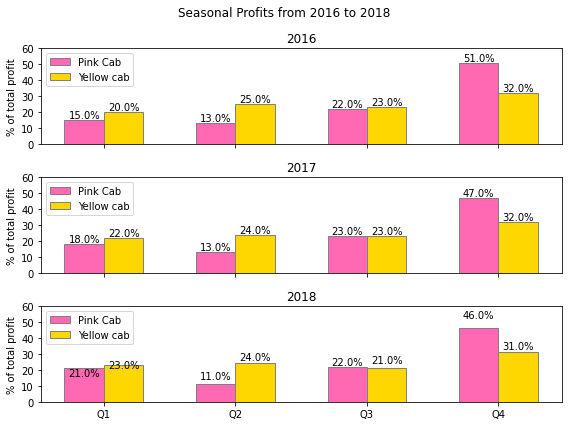

In [30]:
barWidth = 0.3
br1 = np.arange(4)
br2 = [x + barWidth for x in br1]

fig, axs = plt.subplots(3,1, sharex=True, figsize= (8,6))

# fig, axs = plt.subplots(nrows=1,ncols=2, figsize= (8,6))
fig.suptitle('Seasonal Profits from 2016 to 2018')

pi_q1 = axs[0].bar(br1, sea_profit_annpor[0,0,:], width = barWidth, color = 'hotpink', align='center', edgecolor ='grey')
ye_q1 = axs[0].bar(br2, sea_profit_annpor[1,0,:], width = barWidth, color = 'gold', align='center', edgecolor ='grey')
axs[0].bar_label(pi_q1,labels=[str(100*sea_profit_annpor[0,0,0])+'%',str(100*sea_profit_annpor[0,0,1])+'%',str(100*sea_profit_annpor[0,0,2])+'%',str(100*sea_profit_annpor[0,0,3])+'%'])
axs[0].bar_label(ye_q1,labels=[str(100*sea_profit_annpor[1,0,0])+'%',str(100*sea_profit_annpor[1,0,1])+'%',str(100*sea_profit_annpor[1,0,2])+'%',str(100*sea_profit_annpor[1,0,3])+'%'])
axs[0].legend(['Pink Cab', 'Yellow cab'])
axs[0].set_title('2016')
axs[0].set_xticks([r + 0.5*barWidth for r in range(4)], ['Q1','Q2','Q3','Q4'])
axs[0].set_yticks(np.arange(0,0.7,0.1),[0, 10, 20, 30, 40, 50, 60])
axs[0].set_ylabel('% of total profit')

pi_q2 = axs[1].bar(br1, sea_profit_annpor[0,1,:], width = barWidth, color = 'hotpink', align='center', edgecolor ='grey')
ye_q2 = axs[1].bar(br2, sea_profit_annpor[1,1,:], width = barWidth, color = 'gold', align='center', edgecolor ='grey')
axs[1].bar_label(pi_q2,labels=[str(100*sea_profit_annpor[0,1,0])+'%',str(100*sea_profit_annpor[0,1,1])+'%',str(100*sea_profit_annpor[0,1,2])+'%',str(100*sea_profit_annpor[0,1,3])+'%'])
axs[1].bar_label(ye_q2,labels=[str(100*sea_profit_annpor[1,1,0])+'%',str(100*sea_profit_annpor[1,1,1])+'%',str(100*sea_profit_annpor[1,1,2])+'%',str(100*sea_profit_annpor[1,1,3])+'%'])
axs[1].legend(['Pink Cab', 'Yellow cab'])
axs[1].set_title('2017')
axs[1].set_xticks([r + 0.5*barWidth for r in range(4)], ['Q1','Q2','Q3','Q4'])
axs[1].set_yticks(np.arange(0,0.7,0.1),[0, 10, 20, 30, 40, 50, 60])
axs[1].set_ylabel('% of total profit')

axs[2].bar(br1, sea_profit_annpor[0,2,:], width = barWidth, color = 'hotpink', align='center', edgecolor ='grey')
axs[2].bar(br2, sea_profit_annpor[1,2,:], width = barWidth, color = 'gold', align='center', edgecolor ='grey')
axs[2].bar_label(pi_q1,labels=[str(100*sea_profit_annpor[0,2,0])+'%',str(100*sea_profit_annpor[0,2,1])+'%',str(100*sea_profit_annpor[0,2,2])+'%',str(100*sea_profit_annpor[0,2,3])+'%'])
axs[2].bar_label(ye_q1,labels=[str(100*sea_profit_annpor[1,2,0])+'%',str(100*sea_profit_annpor[1,2,1])+'%',str(100*sea_profit_annpor[1,2,2])+'%',str(100*sea_profit_annpor[1,2,3])+'%'])
axs[2].legend(['Pink Cab', 'Yellow cab'])
axs[2].set_title('2018')
axs[2].set_xticks([r + 0.5*barWidth for r in range(4)], ['Q1','Q2','Q3','Q4'])
axs[2].set_yticks(np.arange(0,0.7,0.1),[0, 10, 20, 30, 40, 50, 60])
axs[2].set_ylabel('% of total profit')

fig.tight_layout()


# profits per ride

# profit and rides on holiday

In [229]:
holiday = pd.read_csv('~/dg_intern/DataSets/us_federal_holidays_2011_2020.csv', skiprows = 50, names = ['Date', 'Holiday'], nrows = 30)
# holiday.head()
# holiday.iloc[50:60]
print(holiday)

          Date                              Holiday
0   12/25/2015                        Christmas Day
1     1/1/2016                       New Year's Day
2    1/18/2016  Birthday of Martin Luther King, Jr.
3    2/15/2016                Washington's Birthday
4    5/30/2016                         Memorial Day
5     7/4/2016                     Independence Day
6     9/5/2016                            Labor Day
7   10/10/2016                         Columbus Day
8   11/11/2016                         Veterans Day
9   11/24/2016                     Thanksgiving Day
10  12/26/2016                        Christmas Day
11    1/2/2017                       New Year's Day
12   1/16/2017  Birthday of Martin Luther King, Jr.
13   2/20/2017                Washington's Birthday
14   5/29/2017                         Memorial Day
15    7/4/2017                     Independence Day
16    9/4/2017                            Labor Day
17   10/9/2017                         Columbus Day
18  11/10/20

In [234]:
b = set(holiday['Holiday'])
holiday_list = []
for name in b:
    holiday_list.append(name)
print(holiday_list)

['Labor Day', 'Christmas Day', 'Independence Day', 'Columbus Day', 'Veterans Day', 'Birthday of Martin Luther King, Jr.', "New Year's Day", 'Thanksgiving Day', "Washington's Birthday", 'Memorial Day']


In [236]:
# 10 holidays in total, to compare, the last one should be averaged over none-holiday values
# (company, 10 holidays + 1 non-holidays)
holiday_rides = np.ma.zeros((2, 3, 11)) 
holiday_profits = np.ma.zeros((2, 3, 11))
days = [0,0,0]
for i in range(len(holiday['Date'])):
    holiday_date = holiday['Date'][i]
    holiday_date_list = re.split(r'/', holiday_date)
    for j in range(len(cab_trans_customer['Date of Travel'])):
        date = cab_trans_customer['Date of Travel'][j]
        mon = 10* int(date[5]) + int(date[6])
        day = 10* int(date[8]) + int(date[9])
        if cab_trans_customer['Company'][j] == 'Pink Cab':
            cab = 0
        elif cab_trans_customer['Company'][j] == 'Yellow Cab':
            cab = 1
            
        if (holiday_date_list[2] == date[:4]) and (int(holiday_date_list[0]) == mon) and (int(holiday_date_list[1]) == day):
            # identify the holiday
            holiday_label = holiday['Holiday'][i]
            # identify the index
            holiday_index = holiday_list.index(holiday_label)
            # count
            holiday_rides[cab, int(date[:4]) - 2016, holiday_index] +=1
            holiday_profits[cab, int(date[:4]) - 2016, holiday_index] += cab_trans_customer['Price Charged'][j] - cab_trans_customer['Cost of Trip'][j]
        else:
            if j == 0:
                days[int(date[:4]) - 2016] += 1
            ### need to count the days here too, to compare averaged normal day and holiday
            elif cab_trans_customer['Date of Travel'][j-1] != date:
                days[int(date[:4]) - 2016] +=1
            # holiday_rides[cab, 10] / sum(days)
            holiday_rides[cab,int(date[:4]) - 2016, 10] +=1 # total rides
            holiday_profits[cab, int(date[:4]) - 2016, 10] += cab_trans_customer['Price Charged'][j] - cab_trans_customer['Cost of Trip'][j]

In [ ]:
holiday_rides[:,:, 10] = holiday_rides[:, 10]/days
holiday_rides[:,:10] = holiday_rides[:, :10]/3 
holiday_profits[:,:, 10] = holiday_profits[:, 10]/days
holiday_profits[:,:10] = holiday_profits[:, :10]/3 

# Problem point: above!!

# city-wise customers

In [32]:
def extract_number(number): # number in the format of ' ' with comma and space.
    number = number.strip()
    count = len(number) //4
    t = 0
    sum = 0
    for i, v in enumerate(number):
        if v == ',':
            continue
        else:
            sum += int(v) * (10**(len(number) - 1 - count - t))
            t += 1  
    return sum

check if there's redundent redord

In [33]:
a = set(cab_trans_customer['City'])
city_name_list = [] # collect the list of city where there're customers
for name in city['City']:
    if name in a:
        if name in city_name_list:
            continue
        else:
            city_name_list.append(name)
        continue
    else:
        print('index 14: ' + name + ' is not in the record.')
print('The cities where customers of two cab services cover are listed here: ' + str(city_name_list))

index 14: SAN FRANCISCO CA is not in the record.
The cities where customers of two cab services cover are listed here: ['NEW YORK NY', 'CHICAGO IL', 'LOS ANGELES CA', 'MIAMI FL', 'SILICON VALLEY', 'ORANGE COUNTY', 'SAN DIEGO CA', 'PHOENIX AZ', 'DALLAS TX', 'ATLANTA GA', 'DENVER CO', 'AUSTIN TX', 'SEATTLE WA', 'TUCSON AZ', 'SACRAMENTO CA', 'PITTSBURGH PA', 'WASHINGTON DC', 'NASHVILLE TN', 'BOSTON MA']


In [34]:
# user portion
city_wise_user = np.ma.empty((20))
for i, city_name in enumerate(city['City']):
    city_wise_user[i] = extract_number(city['Users'][i]) / extract_number(city['Population'][i])


In [123]:

city_wise_customer = np.ma.zeros((2, 3, 19))
customer_name_list = [[],[]]
for i in range(len(cab_trans_customer['City'])):
    if cab_trans_customer['Company'][i] == 'Pink Cab':
        cab = 0
    elif cab_trans_customer['Company'][i] == 'Yellow Cab':
        cab = 1
        
    if cab_trans_customer['Customer ID'][i] in customer_name_list[cab]:
        continue
    else:
        index = city_name_list.index(cab_trans_customer['City'][i])
        city_wise_customer[cab,int(cab_trans_customer['Date of Travel'][i][:4]) - 2016, index] += 1
        customer_name_list[cab].append(cab_trans_customer['Customer ID'][i])  
            
                

In [36]:
# check if the number is within the range
for i in range(19):
    if sum(city_wise_customer[0,:,i])+sum(city_wise_customer[1,:,i]) > extract_number(city['Users'][i]):
        print(i, city['City'][i])
        print('number of customers',sum(city_wise_customer[0,:,i])+sum(city_wise_customer[1,:,i]))
        print('number of customers of pink',sum(city_wise_customer[0,:,i]))
        print('number of customers of yellow', sum(city_wise_customer[1,:,i]))
        print('users',city['Users'][i])
    if sum(city_wise_customer[0,:,i])+sum(city_wise_customer[1,:,i]) > extract_number(city['Population'][i]):
        print('error!!')
    

16 PITTSBURGH PA
number of customers 5109.0
number of customers of pink 2109.0
number of customers of yellow 3000.0
users  3,643 


## portion of the customers in different service and city

In [37]:
city_wise_customer_portion = np.ma.zeros((2, 3, 19))
for i in range(2):
    for j in range(3):
        for k in range(19):
            city_wise_customer_portion[i, j, k] = city_wise_customer[i, j, k] / sum(city_wise_customer[:, j, k])
            city_wise_customer_portion[i, j, k] = round(city_wise_customer_portion[i, j, k],3)



## plots

/var/folders/md/twjjy3517bx9b44nk_x7wtbm0000gn/T/ipykernel_25344/3184191656.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


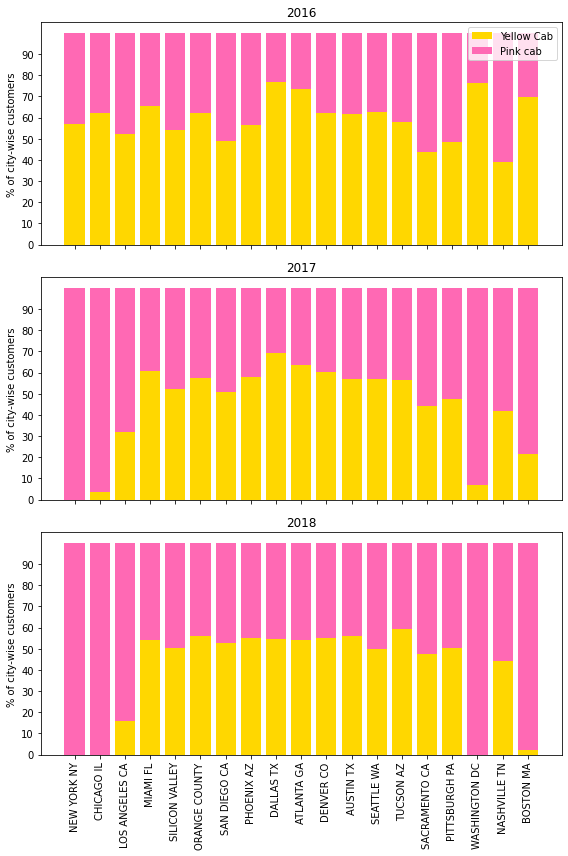

In [153]:
barWidth = 0.8
br1 = np.arange(19)
fig, ax = plt.subplots(nrows=3,ncols=1, figsize= (8,12), sharex = True)
for i in range(3):
       ye_no = ax[i].bar(br1, 100*city_wise_customer_portion[1, i,:], barWidth, label = 'Yellow Cab', color = 'gold')
       pi_no = ax[i].bar(br1, 100*city_wise_customer_portion[0, i,:], barWidth, bottom = 100*city_wise_customer_portion[1, i],
              label='Pink Cab', color = 'hotpink')
       # ax[i].legend(['Pink Cab', 'Yellow cab'])
       ax[i].set_title(str(2016+i))
       ax[i].set_xticks(np.arange(19),labels = city_name_list, rotation = 90)
       ax[i].set_yticks(np.arange(0,100,10))
       ax[i].set_ylabel('% of city-wise customers')
ax[0].set_xticks(np.arange(19),labels = city_name_list, rotation = 90)
ax[0].legend(['Yellow Cab', 'Pink cab'])
fig.tight_layout()
fig.show()


need to range from large to small portion

In [207]:
def bubbleSort(arr):
    n = len(arr)
    index = np.arange(n)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1] :
                arr[j], arr[j+1] = arr[j+1], arr[j]
                index[j], index[j+1] = index[j+1], index[j]
    return arr, index

In [208]:
city_wise_customer_sum = np.sum(city_wise_customer[1], axis = 0) + np.sum(city_wise_customer[0], axis = 0)
# print(len(city_wise_customer_sum))
city_wise_customer_sum, index_list = bubbleSort(city_wise_customer_sum)
a = np.sum(city_wise_customer[1], axis = 0)
b = np.sum(city_wise_customer[0], axis = 0)

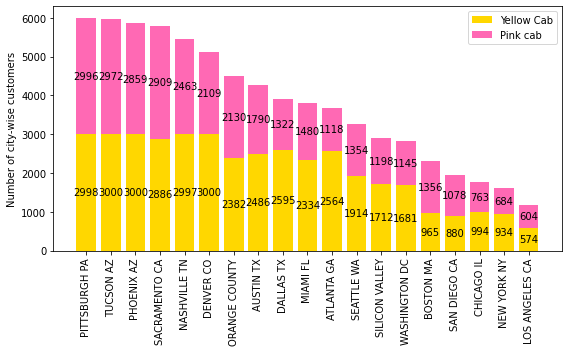

In [171]:
barWidth = 0.8
br1 = np.arange(19)
fig, ax = plt.subplots(nrows=1,ncols=1, figsize= (8,5), sharex = True)

ye_cu = ax.bar(br1, [a[i] for i in index_list[::-1]], barWidth, label = 'Yellow Cab', color = 'gold')
pi_cu = ax.bar(br1, [b[i] for i in index_list[::-1]], barWidth, bottom = [a[i] for i in index_list[::-1]], label='Pink Cab', color = 'hotpink')
ax.bar_label(ye_cu,label_type='center')
ax.bar_label(pi_cu,label_type='center')
# ax[i].legend(['Pink Cab', 'Yellow cab'])
ax.set_xticks(np.arange(19),labels = [city_name_list[i] for i in index_list], rotation = 90)
# ax.set_yticks(np.arange(0,120000,20000), ['0', '20k', '40k', '60k', '80k', '100k'])
ax.set_ylabel('Number of city-wise customers')
ax.legend(['Yellow Cab', 'Pink cab'])
fig.tight_layout()

# customer's retention

defined as the number of customers who used the cab service more than average rides 

In [40]:
a = set(cab_trans_customer['Customer ID']) # to make the names in order
customer_list = []
for id in customer_id['Customer ID']:
    if id in a:
        if id in customer_list:
            continue
        else:
            customer_list.append(id)
        continue

## retention compared to the mean

In [51]:
# count the number of each customer id and the cab service they used each year
count = np.ma.zeros((len(customer_list), 2,3))
for i in range(len(cab_trans_customer['Customer ID'])):
    index = customer_list.index(cab_trans_customer['Customer ID'][i])
    if cab_trans_customer['Company'][i] == 'Pink Cab':
        cab = 0
    else:
        cab = 1
    count[index,cab, int(cab_trans_customer['Date of Travel'][i][:4]) - 2016] +=1

In [146]:
customer_retention = np.ma.empty((2,3))
for i in range(len(customer_list)):
    for j in range(3):
        if count[i, 0, j] >= np.mean(count[:,0,j], axis = 0):
            customer_retention[0,j] += 1
        if count[i, 1, j] >= np.mean(count[:,1,j], axis = 0):
            customer_retention[1,j] += 1 

In [147]:
customer_retention_ratio = np.ma.empty((2,3))
for i in range(2):
    customer_retention_ratio[i,:] = customer_retention[i,:]/len(customer_name_list[i])
print(customer_retention_ratio)

[[0.5153417878131766 0.5766470770182494 0.5691308382307454]
 [0.3889612993783838 0.31724984960898334 0.30915379987968716]]


In [ ]:
for j in range(3):
    print('The average rides taken by the customers in Pink Cab in ' + str(2016+j) + '\n' + str(np.mean(count[:,0,j], axis = 0)))
    print('The average rides taken by the customers in Yellow Cab in ' + str(2016+j) + '\n' +str(np.mean(count[:,1,j], axis = 0)))

The average rides taken by the customers in Pink Cab in 2016
0.5434688393863223
The average rides taken by the customers in Yellow Cab in 2016
1.7820707289590014
The average rides taken by the customers in Pink Cab in 2017
0.6570382248418133
The average rides taken by the customers in Yellow Cab in 2017
2.1276978417266186
The average rides taken by the customers in Pink Cab in 2018
0.6351304498569819
The average rides taken by the customers in Yellow Cab in 2018
2.042407038224842


## plot

Text(0, 0.5, 'Number of customers')

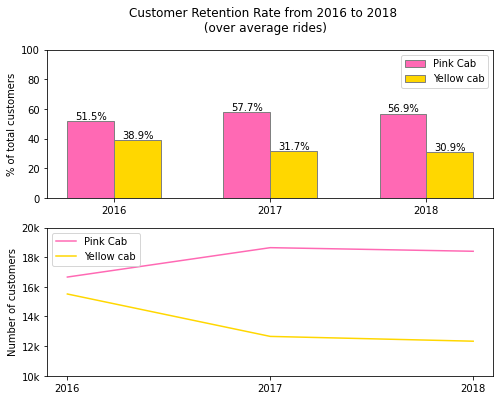

In [149]:
barWidth = 0.3
br1 = np.arange(3)
br2 = [x + barWidth for x in br1]
fig, axs = plt.subplots(nrows=2,ncols=1, figsize= (8,6))
fig.suptitle('Customer Retention Rate from 2016 to 2018\n (over average rides)')

pi_q = axs[0].bar(br1, customer_retention_ratio[0,:], width = barWidth, color = 'hotpink', align='center', edgecolor ='grey')
ye_q = axs[0].bar(br2, customer_retention_ratio[1,:], width = barWidth, color = 'gold', align='center', edgecolor ='grey')
axs[0].bar_label(pi_q,labels=[str(round(100*customer_retention_ratio[0,0],1))+'%',str(round(100*customer_retention_ratio[0,1],1))+'%',str(round(100*customer_retention_ratio[0,2],1))+'%'])
axs[0].bar_label(ye_q,labels=[str(round(100*customer_retention_ratio[1,0],1))+'%',str(round(100*customer_retention_ratio[1,1],1))+'%',str(round(100*customer_retention_ratio[1,2],1))+'%'])
axs[0].legend(['Pink Cab', 'Yellow cab'])
axs[0].set_xticks([r + 0.5*barWidth for r in range(3)], ['2016','2017','2018'])
axs[0].set_yticks(np.arange(0,1.2,0.2),['0', '20', '40', '60', '80', '100'])
axs[0].set_ylabel('% of total customers')

axs[1].plot(np.arange(2016, 2019), customer_retention[0,:], color = 'hotpink')
axs[1].plot(np.arange(2016, 2019), customer_retention[1,:], color = 'gold')
axs[1].legend(['Pink Cab', 'Yellow cab'])
axs[1].set_xticks(np.arange(2016, 2019), ['2016','2017','2018'])
axs[1].set_yticks(np.arange(10e3,22e3, 2e3))
axs[1].set_yticklabels(['10k', '12k', '14k', '16k', '18k', '20k'])
axs[1].set_ylabel('Number of customers')

## retention compared to 5

In [140]:
customer_retention = np.ma.empty((2,3))
for i in range(len(customer_list)):
    for j in range(3):
        # print('The average rides taken by the customers in Pink Cab: ' + str(np.mean(count[:,0,j], axis = 0)))
        # print('The average rides taken by the customers in Yellow Cab: ' + str(np.mean(count[:,1,j], axis = 0)))
        if count[i, 0, j] >= 5:
            customer_retention[0,j] += 1 
        if count[i, 1, j] >= 5:
            customer_retention[1,j] += 1 

In [141]:
customer_retention_ratio = np.ma.empty((2,3))
for i in range(2):
    customer_retention_ratio[i,:] = customer_retention[i,:]/len(customer_name_list[i])
print(customer_retention_ratio)

[[0.0062171357871945564 0.012155892360037118 0.010392824002474483]
 [0.15670743934228995 0.19463104070583517 0.18475536394626027]]


## plot

Text(0, 0.5, 'Number of customers')

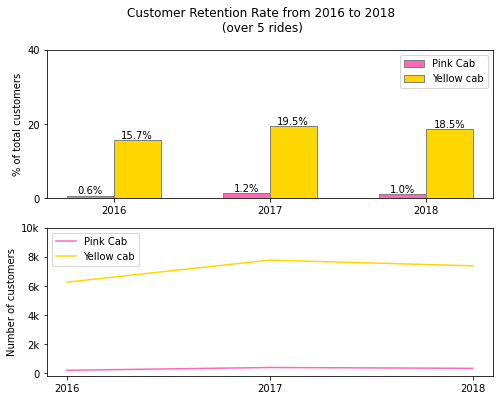

In [145]:
barWidth = 0.3
br1 = np.arange(3)
br2 = [x + barWidth for x in br1]
fig, axs = plt.subplots(nrows=2,ncols=1, figsize= (8,6))
fig.suptitle('Customer Retention Rate from 2016 to 2018 \n (over 5 rides) ')

pi_q = axs[0].bar(br1, customer_retention_ratio[0,:], width = barWidth, color = 'hotpink', align='center', edgecolor ='grey')
ye_q = axs[0].bar(br2, customer_retention_ratio[1,:], width = barWidth, color = 'gold', align='center', edgecolor ='grey')
axs[0].bar_label(pi_q,labels=[str(round(100*customer_retention_ratio[0,0],1))+'%',str(round(100*customer_retention_ratio[0,1],1))+'%',str(round(100*customer_retention_ratio[0,2],1))+'%'])
axs[0].bar_label(ye_q,labels=[str(round(100*customer_retention_ratio[1,0],1))+'%',str(round(100*customer_retention_ratio[1,1],1))+'%',str(round(100*customer_retention_ratio[1,2],1))+'%'])
axs[0].legend(['Pink Cab', 'Yellow cab'])
axs[0].set_xticks([r + 0.5*barWidth for r in range(3)], ['2016','2017','2018'])
axs[0].set_yticks(np.arange(0,0.6,0.2),['0', '20', '40'])
axs[0].set_ylabel('% of total customers')

axs[1].plot(np.arange(2016, 2019), customer_retention[0,:], color = 'hotpink')
axs[1].plot(np.arange(2016, 2019), customer_retention[1,:], color = 'gold')
axs[1].legend(['Pink Cab', 'Yellow cab'])
axs[1].set_xticks(np.arange(2016, 2019), ['2016','2017','2018'])
axs[1].set_yticks(np.arange(0,12e3, 2e3))
axs[1].set_yticklabels(['0','2k','4k','6k','8k','10k'])
axs[1].set_ylabel('Number of customers')

# temporal change of number of customers